# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [3]:
# import libraries here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [6]:
# YOUR CODE HERE
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [8]:
# your solution here
temp.head(-1)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [10]:
# YOUR CODE HERE
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


#### Selecciona las filas en las que el estado es New York

In [12]:
# YOUR CODE HERE
ny= temp[temp['State']== 'New York']
print(ny)

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [14]:
# YOUR CODE HERE
ny['Temperature'].mean()

10.74074074074074

#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [16]:
# your answer here
superiores = temp[temp['Temperature'] > 15]
print(superiores)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [18]:
# YOUR CODE HERE
ciudades = superiores.loc[:,['City']]
print(ciudades)

       City
0       NYC
3  Hartford
5    Treton
6    Newark


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [20]:
# YOUR CODE HERE
exactas = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
print(exactas)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222


In [21]:
exactas['State'].value_counts()

State
New York       1
Connecticut    1
Name: count, dtype: int64

#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [23]:
# YOUR CODE HERE
estado1 = temp[temp['State']== 'New York']
print(estado1)
print('-------')
mediaestado1 = estado1['Temperature'].mean()
print('la media del estado es', mediaestado1)
print('-------')
desvestado1 = estado1['Temperature'].std()
print('la desv del estado es', desvestado1)

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333
-------
la media del estado es 10.74074074074074
-------
la desv del estado es 8.133404168888054


In [24]:
estado2 = temp[temp['State']== 'Connecticut']
print(estado2)
print('-------')
mediaestado2= estado2['Temperature'].mean()
print('la media del estado es', mediaestado2)
print('-------')

         City        State  Temperature
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
-------
la media del estado es 15.833333333333332
-------


In [25]:
estado3 = temp[temp['State']== 'New Jersey']
print(estado3)
print('-------')
mediaestado3 = estado3['Temperature'].mean()
print('la media del estado es', mediaestado3)
print('-------')

     City       State  Temperature
5  Treton  New Jersey    22.222222
6  Newark  New Jersey    20.000000
-------
la media del estado es 21.11111111111111
-------


Moises me ha enseñado que haciendo un groupby podria tener todo resuelto mas rapido, para proximas ocasiones lo usare. no he acabado el estado2 y 3 por este motivo, ya que solo es replicar el estado1

# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [29]:
# YOUR CODE HERE
empleados = pd.read_csv('employee.csv')

#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [31]:
# YOUR CODE HERE
empleados.info()
print('--------------')
empleados.head(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes
--------------


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

In [33]:
# your answer here
# la mayoria llevan menos de 5 años
# los sueldos saltan de 30 a 55 

<Axes: xlabel='Years', ylabel='Count'>

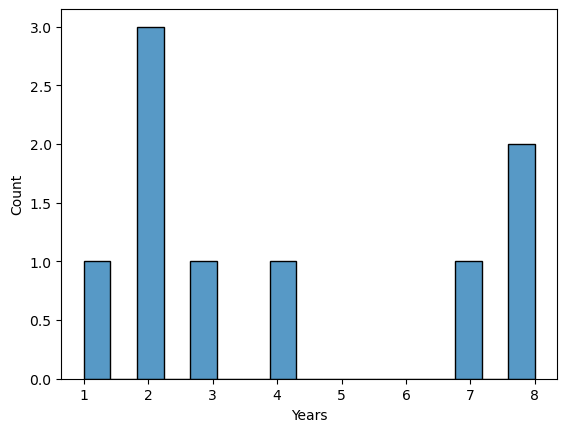

In [34]:
# YOUR CODE HERE
sns.histplot(x=empleados.Years, bins = 17)

<Axes: xlabel='Salary', ylabel='Count'>

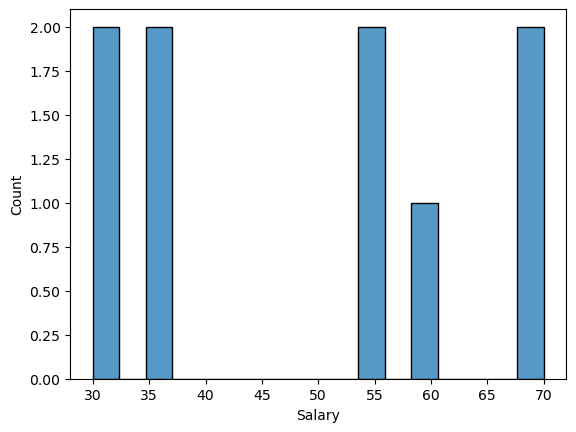

In [35]:
# YOUR CODE HERE
sns.histplot(x=empleados.Salary, bins = 17)

#### ¿Cuál es el salario medio en esta empresa?

In [37]:
# YOUR CODE HERE
sueldomedio = empleados['Salary'].mean()
print('el sueldo medio es' ,sueldomedio)
print('-----------------')
empleados['Salary'].mean()

el sueldo medio es 48.888888888888886
-----------------


48.888888888888886

#### ¿Cuál es el salario más alto?

In [39]:
# YOUR CODE HERE
empleados['Salary'].max()

70

#### ¿Cuál es el salario más bajo?

In [41]:
# YOUR CODE HERE
empleados['Salary'].min()

30

#### ¿Quiénes son los empleados con el salario más bajo?

In [43]:
# YOUR CODE HERE
empleados[empleados['Salary'] == empleados['Salary'].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [45]:
# YOUR CODE HERE
david = empleados[empleados['Name']== 'David']
print(david)
print('--------------------')
empleados[empleados['Name'] == 'David']

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30
--------------------


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### ¿Podría dar sólo el sueldo de David?

In [47]:
# YOUR CODE HERE
david.loc[:,['Salary']]


,Salary
2,30


#### Printea todas las líneas en las que el cargo es asociado

In [49]:
# YOUR CODE HERE
empleados[empleados['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [51]:
# YOUR CODE HERE
empleados.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [52]:
# YOUR CODE HERE
empleados.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [54]:
# YOUR CODE HERE
asociados = empleados[(empleados['Title'] == 'associate') & (empleados['Salary'] > 55)]
print(asociados)

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [56]:
# YOUR CODE HERE
años = empleados.groupby('Years')['Salary'].mean()
print('los sueldos dependiendo de los años trabajados son  ',años)

los sueldos dependiendo de los años trabajados son   Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


#### ¿Cuál es el salario medio por título?

In [58]:
# YOUR CODE HERE
titulo = empleados.groupby('Title')['Salary'].mean()
print('los sueldos dependiendo de titulo son  ',titulo)

los sueldos dependiendo de titulo son   Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

<Axes: xlabel='Salary'>

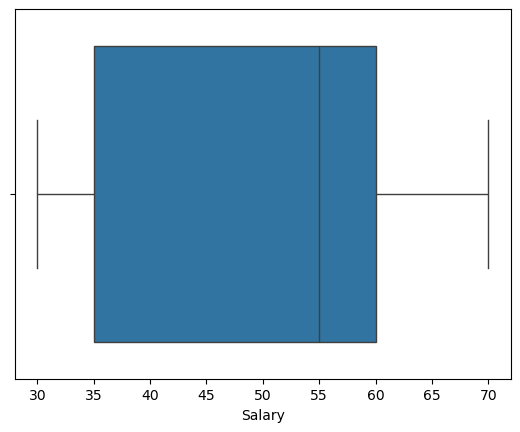

In [60]:
# YOUR CODE HERE
sns.boxplot(x='Salary',data=empleados)

<Axes: xlabel='Salary', ylabel='Title'>

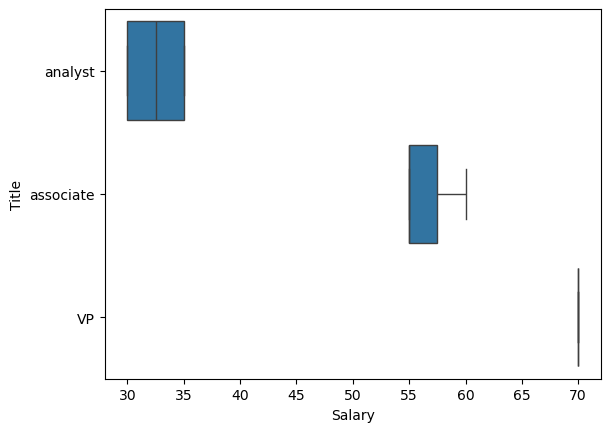

In [61]:
sns.boxplot(x='Salary', y='Title', data=empleados)

In [62]:
# print first quartile here

In [63]:
# print third quartile here

#### ¿Es diferente el salario medio por género?

In [65]:
# your answer here
genero = empleados.groupby('Gender')['Salary'].mean()
print('los sueldos dependiendo del genero son  ',genero)

los sueldos dependiendo del genero son   Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [67]:
# your answer here
media1=empleados.groupby('Department').agg({'Salary':['mean','max','min'],'Years':['mean','max','min','std']})
print(media1)

           Salary             Years                  
             mean max min      mean max min       std
Department                                           
HR          45.00  70  30  4.666667   8   2  3.055050
IT          48.75  70  30  4.500000   8   1  3.511885
Sales       55.00  55  55  2.500000   3   2  0.707107


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [69]:
# your answer here


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [72]:
# your answer here

orders = pd.read_csv('Orders.csv')

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [74]:
# your answer here
orders.head(-1)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397918,541903,581587,23256,2011,12,5,12,childrens cutlery spaceboy,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60


In [75]:
# your answer here
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


#### ¿Cuál es el precio medio de compra?

In [77]:
# your answer here
preciomedio=[orders['amount_spent'].mean()]
print('el precio medio es',preciomedio)

el precio medio es [22.394748504739596]


#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [79]:
# your answer here
orders['amount_spent'].max()

168469.6

In [80]:
# your answer here
orders['amount_spent'].min()

0.0

#### Seleccione todos los clientes que tenemos en España

In [82]:
# your answer here


In [83]:
orders[orders['Country']=='Spain']

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [85]:
# your answer here
paises=orders['Country'].value_counts()
print(paises)

Country
United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [87]:
# your answer here
orders[orders['Quantity']>50]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


In [88]:
#### Selecciona pedidos de España superiores a 50 artículos
orders[(orders['Quantity'] >50) & (orders['Country']=='Spain')]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


In [89]:
# your answer here

In [90]:
#### Seleccionar todos los pedidos gratuitos

In [91]:
# your answer here
orders[orders['amount_spent']== 0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [174]:
# your answer here
lunchbags = orders[orders['Description'].str.contains('lunch bag', case=False, na=False)]
print(lunchbags)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172     lunch bag dolly girl desi

#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [176]:
# your answer here
lunchbags[lunchbags['year']==2011 ]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Muestra la distribución de frecuencias del importe gastado en España.

In [180]:
# your answer here
orders.groupby('Country')='Spain.agg({'amount_spent': [std, 'mean']})

SyntaxError: unterminated string literal (detected at line 2) (3261301077.py, line 2)

#### Seleccione todos los pedidos realizados en el mes de agosto

In [193]:
# your answer here
agosto = orders[orders['month']== 6]
print(agosto)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
145463      209029     555156     23299  2011      6    3     7   
145464      209030     555156     22847  2011      6    3     7   
145465      209031     555157     23075  2011      6    3     7   
145466      209032     555157    47590B  2011      6    3     7   
145467      209033     555157     22423  2011      6    3     7   
...            ...        ...       ...   ...    ...  ...   ...   
172643      245898     558637     22032  2011      6    4    20   
172644      245899     558637     22028  2011      6    4    20   
172645      245900     558637     22033  2011      6    4    20   
172646      245901     558637     22029  2011      6    4    20   
172647      245902     558637     22024  2011      6    4    20   

                         Description  Quantity          InvoiceDate  \
145463  food cover with beads set 2          6  2011-06-01 07:37:00   
145464   bread bin diner style ivory         1  2011-

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [199]:
# your answer here
paises2=agosto['Country'].value_counts()
print(paises2)


Country
United Kingdom        23714
Germany                 653
France                  573
EIRE                    539
Netherlands             324
Belgium                 230
Spain                   181
Australia               169
Norway                  166
Switzerland             125
Denmark                 106
Channel Islands          81
Canada                   57
Portugal                 48
Cyprus                   47
Malta                    45
Sweden                   35
European Community       20
Iceland                  18
Poland                   16
Finland                  13
Italy                    10
Unspecified               9
Japan                     6
Name: count, dtype: int64


#### ¿Cuál es el gasto medio por país?

In [203]:
# your answer here

mediopais = orders.groupby('Country')['amount_spent'].mean()
print(mediopais)


Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### ¿Cuál es el artículo más caro?

In [215]:
# your answer here
mascaro = orders['UnitPrice'].idxmax()

productomascaro = orders.loc[mascaro]
print(productomascaro)


Unnamed: 0                   173382
InvoiceNo                    551697
StockCode                      POST
year                           2011
month                             5
day                               2
hour                             13
Description                 postage
Quantity                          1
InvoiceDate     2011-05-03 13:46:00
UnitPrice                   8142.75
CustomerID                    16029
Country              United Kingdom
amount_spent                8142.75
Name: 118352, dtype: object


#### ¿Cuál fue la cantidad media gastada al año?

In [217]:
# your answer here

mediaanual = orders['amount_spent'].mean()
print(mediaanual)

22.394748504739596
